# Exercise 1 - Introduction to Image Analysis using Python

This exercise introduces image analysis in Python.

## Learning Objectives

After completing this exercise, the student should be able to do the following:

1. Install and use the [Conda](https://pythonsupport.dtu.dk/install/python.html) framework.
2. Create and activate a **conda virtual environment**.
3. Install Python packages in a virtual environment.
4. Import Python packages.
5. Read an image
6. Extract information about the dimensions of the image and the pixel type.
7. Display an image using both grey level scaling and using color maps.
8. Display an image histogram.
9. Extract individual bin counts and the bin edges from an image histogram.
10. Describe the (row, col) coordinate system used in **scikit-image**.
11. Inspect pixel values in an image using (row, column) pixel coordinates.
12. Use **NumPy slicing** to extract and change pixel values in an image.
13. Compute a binary mask image based on an input image.
14. Use a binary mask image to extract and change pixel values in an image.
15. Inspect RGB values in a color image.
16. Extract and change RGB values in a color image.
17. Transfer images from a camera or a mobile phone to the computer so it can be used in Python image analysis scripts.
18. Rescale an image, where the width and height of the image are scaled with the same factor.
19. Resize and image, where the width and height of the image are scaled with the different factors.
20. Transform an RGB image into a grey-level image using `rgb2gray`.
21. Transform a gray-level image into an RGB image `gray2rgb`.
22. Transform a pixel representation from floating points to unsigned bytes using `img_as_ubyte`.
23. Visualize individual color channels in an RGB image.
24. Change and manipulate individual color channels in an RGB image.
25. Sample and visualize grey scale profiles from gray scale images using `profile_line`.
26. Create 3D visualizations of an image, so it is seen as a height map.
27. Read individual DICOM files and get information about the image from the DICOM header.
28. Access the raw pixel data of individual DICOM files.
29. Visualize individual DICOM files and select appropriate gray value mapping limits to enhance contrast.

## Conda, VS Code, virtual environments and setting up Exercises

See the [setup guide](setup.md) for instructions on how to install and setup Conda, VS Code and virtual environments. The guide also includes some navigation tips and tricks in VS code for an easy start and in the end, setup to start the exercises.  

## Importing relevant libraries

Create a new Notebook or Python script in the exercise folder. Then we start by importing some relevant libraries:

In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

## Basic image handling

In this exercise, we will read images from the disk, display them and make some basic examinations of them.

One image is a part of an X-ray image of a hand. X-ray examinations are extremely common and are used for example
for bone fracture detection.

**Exercise 1:** *Start by reading the image:*

In [2]:
# Directory containing data and images
in_dir = "../data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

**Exercise 2:** *Check the image dimensions:*

In [3]:
print(im_org.shape)

(512, 512)


**Exercise 3:** *Check the pixel type (unsigned int, boolean, double or something else):*

In [4]:
print(im_org.dtype)

uint8


**Exercise 4:** *Display the image and try to use the simple viewer tools like the **zoom** tool to inspect the finger bones. You can see the pixel values at a given pixel position (in x, y coordinates) in the upper right corner. Where do you see the highest and lowest pixel values?*


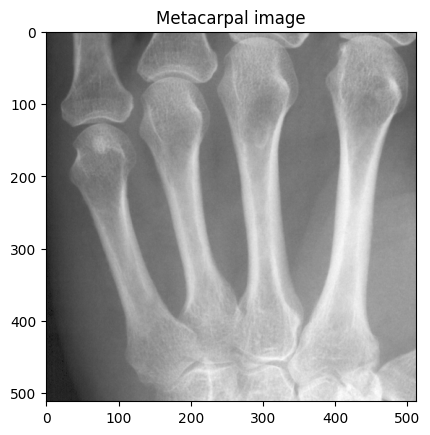

In [5]:
plt.imshow(im_org)
plt.title('Metacarpal image')
plt.imshow(im_org,cmap="gray")

## Color maps

When working with gray level images, they are viewed using **256** levels of
gray. There is another method of viewing them using a **color map**
where each gray level is shown as a color. [Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) has several
predefined color maps.

**Exercise 5:** *Display an image using colormap:*


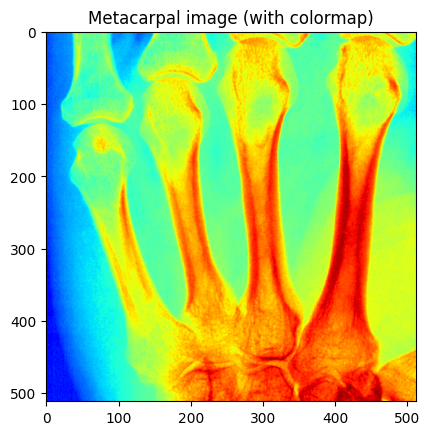

In [6]:
plt.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
plt.show()

A list of color maps can be found here: [Matplotlib color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

**Exercise 6:** *Experiment with different colormaps. For example cool, hot, pink, copper, coolwarm, cubehelix, and terrain.*

## Grey scale scaling

Sometimes, there is a lack of contrast in an image or the brightness levels are not optimals. It possible to scale the way the image is visualized, by forcing a pixel value range to use the full gray scale range (from white to black).

By calling `imshow` like this:

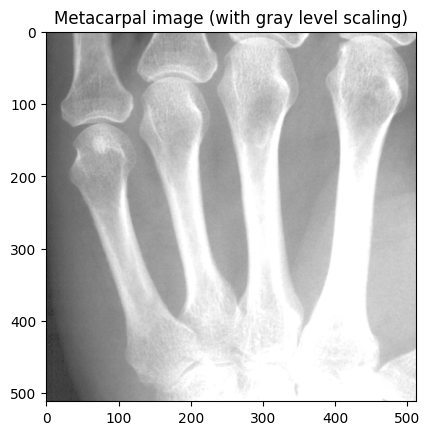

In [7]:
plt.imshow(im_org, vmin=20, vmax=170, cmap="gray")
plt.title('Metacarpal image (with gray level scaling)')
plt.show()

Pixels with values of 20 and below will be visualized black and pixels with values of 170 and above as white and values in between as shades of gray.

**Exercise 7:** *Try to find a way to automatically scale the visualization, so the pixel with the lowest value in the image is shown as black and the pixel with the highest value in the image is shown as white.*


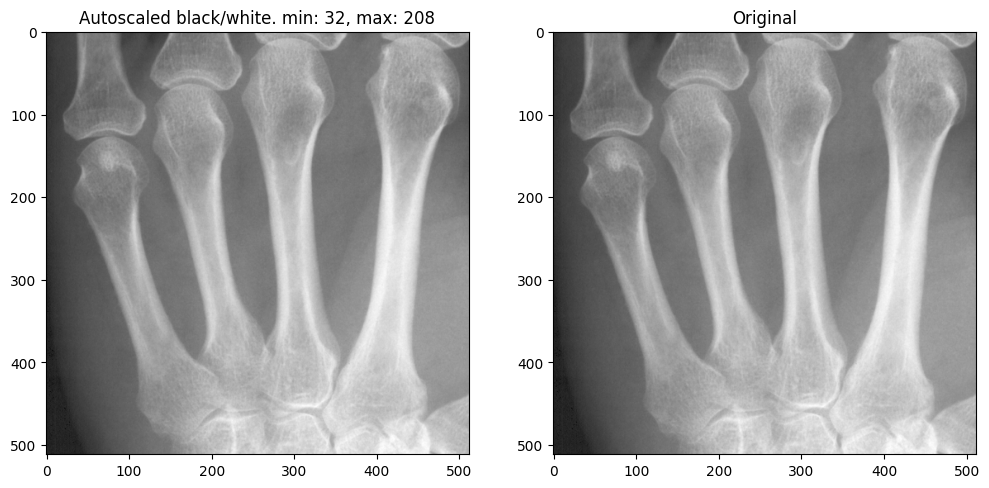

In [8]:
def show_im_autoscale(im: np.ndarray) -> tuple:
    im_flat = im.flatten()
    min_intensity = np.min(im_flat)
    max_intensity = np.max(im_flat)
    
    fig, ax = plt.subplots(1,2,figsize=(12,24))
    ax[0].imshow(im,vmin=min_intensity,vmax=max_intensity,cmap="gray")
    ax[0].set_title(f"Autoscaled black/white. min: {min_intensity}, max: {max_intensity}")
    ax[1].imshow(im, cmap="gray")
    ax[1].set_title("Original")
    

show_im_autoscale(im_org)


## Histogram functions

Computing and visualizing the image histogram is a very important tool to get an idea of the quality of an image.

**Exercise 8:** *Compute and visualise the histogram of the image:*

/tmp/ipykernel_26458/2584199610.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


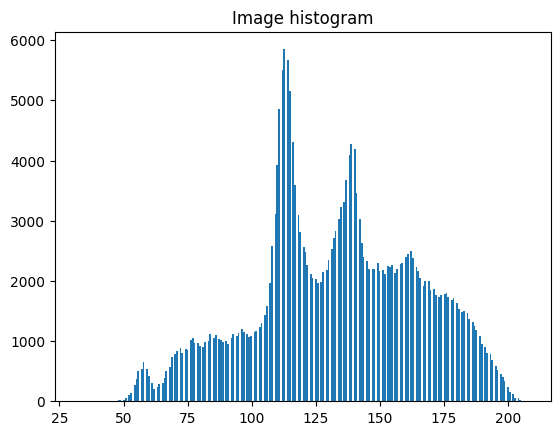

In [9]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

Since the histogram functions takes 1D arrays as input, the function `ravel` is called to convert the image into a 1D array.

The bin values of the histogram can also be stored by writing:

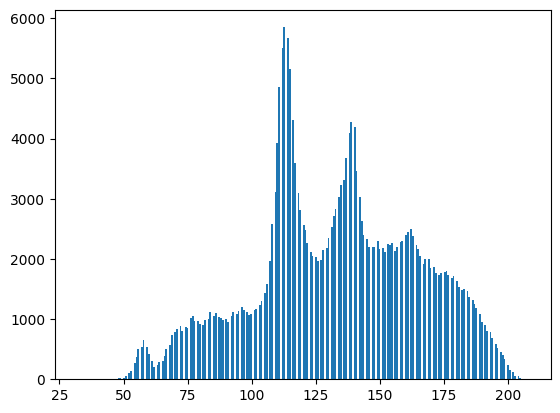

In [10]:
h = plt.hist(im_org.ravel(), bins=256)

The value of a given bin can be found by:

In [11]:
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 1147.0 pixel values in bin 100


In [12]:
h[1][h[0].argmax()]

np.float64(112.4375)

Here `h` is a list of tuples, where in each tuple the first element is the bin count and the second is the bin edge. So the bin edges can for example be found by:

In [13]:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


Here is an alternative way of calling the histogram function:

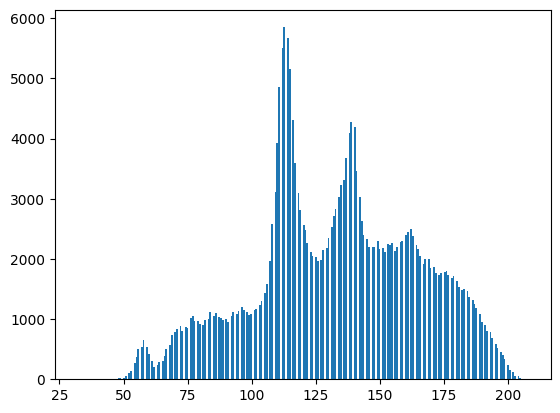

In [14]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

**Exercise 9:** *Use the histogram function to find the most common range of intensities? (hint: you can use the list functions `max` and `argmax`).*

Found max bin: 117 with intensity range [112.4375;113.125]


(112.4375, 113.125, np.int64(117))

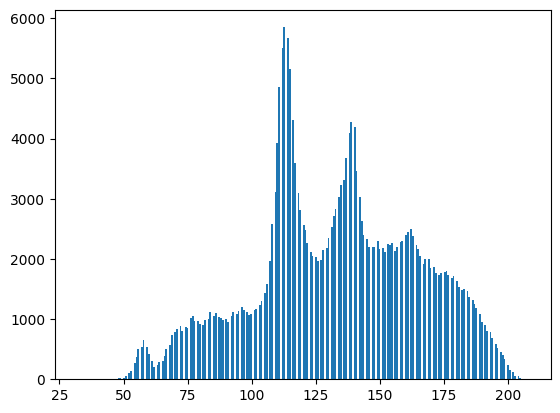

In [15]:
def common_intensity_range(im: np.ndarray, n_bins: int = 256) -> tuple:
    """
    Finds the most commonly found range of intensities. 
    Note: not robustly implemented, edge case of multiple bins with same count are NOT handled. 

    Args:
        im (np.ndarray): image read using plt or io
        n_bins (int, optional): bins used for making the histogram. Defaults to 256.

    Returns:
        tuple: a tuple of floats containing the histogram edges, i.e. the most commonly encountered range of intensities
    """
    h = plt.hist(im.ravel(), bins=n_bins)
    counts = h[0]
    max_bin = counts.argmax()
    result = (float(h[1][max_bin]), float(h[1][max_bin+1]), max_bin)
    print(f"Found max bin: {max_bin} with intensity range [{result[0]};{result[1]}]")
    return result

common_intensity_range(im_org)

## Pixel values and image coordinate systems

We are using **scikit-image** and the image is represented using a **NumPy** array. Therefore, a two-dimensional image is indexed by rows and columns (abbreviated to **(row, col)** or **(r, c)**)  with **(0, 0)** at the top-left corner.

The value of a pixel can be examined by:

In [16]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


where r and c are the row and column of the pixel. 

**Exercise 10:** *What is the pixel value at (r, c) = (110, 90) ?*


In [17]:
print(im_org[110,90])

120



Since the image is represented as a **NumPy** array, the usual **slicing** operations can be used. 

**Exercise 11:** *What does this operation do?*

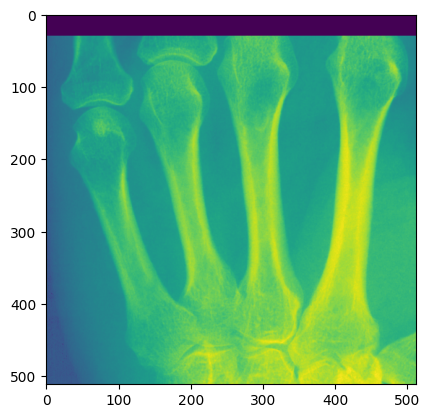

In [18]:
im_org[:30] = 0
plt.imshow(im_org)
plt.show()

A **mask** is a binary image of the same size as the original image, where the values are either 0 or 1 (or True/False). Here

/tmp/ipykernel_26458/2289077098.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mask)
/tmp/ipykernel_26458/2289077098.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


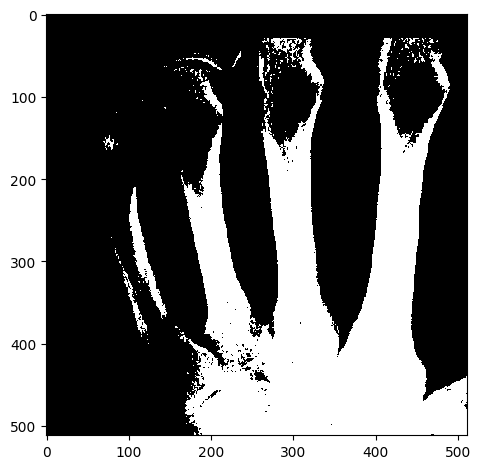

In [19]:
mask = im_org > 150
io.imshow(mask)
io.show()

a mask is created from the original image. 

**Exercise 12:** *Where are the values 1 and where are they 0?*

**Exercise 13:** *What does this piece of code do?*

/tmp/ipykernel_26458/3122219897.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
/tmp/ipykernel_26458/3122219897.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


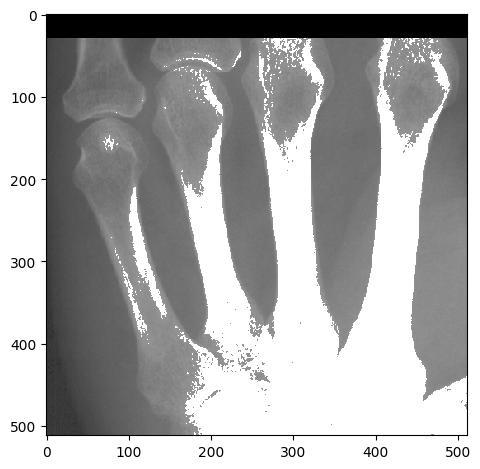

In [20]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

## Color images

In a color image, each pixel is defined using three values: R (red), G (green), and B
(blue).

An example image **ardeche.jpg** is provided.

**Exercise 14:** *Read the image and print the image dimensions and its pixel type. How many rows and columns do the image have?*

Text(0.5, 1.0, "(H,W,C) = (600, 800, 3), pixel type: <class 'numpy.uint8'>. Rows: 600, columns: 800")

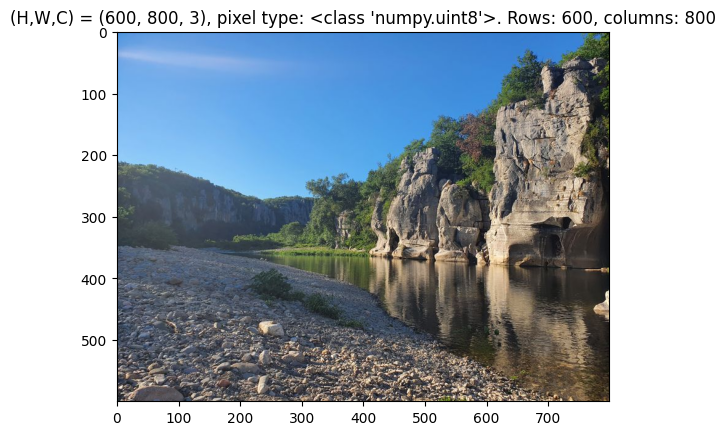

In [21]:
file = in_dir + "ardeche.jpg"
im_org = io.imread(file) #using plt.imread() makes im_org.flags.writable = 0, i.e. protected from write access
plt.imshow(im_org)
H, W, C = im_org.shape 
pixel_type = type(im_org[0,0,0])
plt.title(f"(H,W,C) = {H,W,C}, pixel type: {pixel_type}. Rows: {H}, columns: {W}")

**Exercise 15:** *What are the (R, G, B) pixel values at (r, c) = (110, 90)?*

In [22]:
im_org[110,90]

array([119, 178, 238], dtype=uint8)

A pixel can be assigned an (R, G, B) value by for example:

In [23]:
r = 110
c = 90

im_org[r, c] = [255, 0, 0]

**Exercise 16:** *Try to use NumPy slicing to color the upper half of the photo green.*

*HINT:* The number of rows in the image can be found using `rows = im_org.shape[0]`. Remember to **cast** your computed height into **int** before using it. For example: `r_2 = int(rows / 2)` or use the **division floor operator**: `r_2 = rows // 2`.


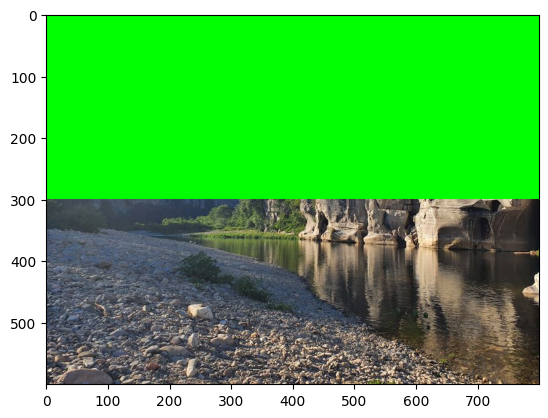

In [24]:
def color_upper_half(im: np.ndarray, color: list = [0,255,0]) -> np.ndarray: 
    """color upper half of RGB image with color corresponding to color given in list (RGB format, 0;255)

    Args:
        im (np.ndarray): image array. Note: must have write flag true 
        color (list, optional): RGB mixture. Defaults to [0,255,0] (green).

    Returns:
        np.ndarray: color-filled image
    """
    assert im.shape[-1] == 3, f"Image must be RGB. Detected {im.shape[-1]} channels."
    im = im.copy()
    H = im.shape[0]
    slice_to = H//2
    im[:slice_to] = color 
    return im

im_green = color_upper_half(im_org)
plt.imshow(im_green)

## Working with your own image

It is now time to work with one of your own images. It is assumed that
you know how to either save an image from a digital camera on the disk
or download an image. Copy the image to your relevant Python folder.

**Exercise 17:** *Start by reading the image and examine the size of it.* 

We can rescale the image, so it becomes smaller and easier to work with:

In [25]:
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True,
                         channel_axis=2)

Here we selected a scale factor of 0.25. We also specify, that we have more than one channel (since it is RGB) and that the channels are kept in the third dimension of the NumPy array. The rescale function has this side effect, that it changes the type of the pixel values.

**Exercise 18:** *What is the type of the pixels after rescaling? Try to show the image and inspect the pixel values. Are they still in the range of [0, 255]?*


In [26]:
type(image_rescaled[0,0,0])
print(image_rescaled.min(),image_rescaled.max())

0.05539025432380382 0.9842865819283186



The function `rescale` scales the height and the width of the image with the same factor. The `resize` functions can scale the height and width of the image with different scales. For example:

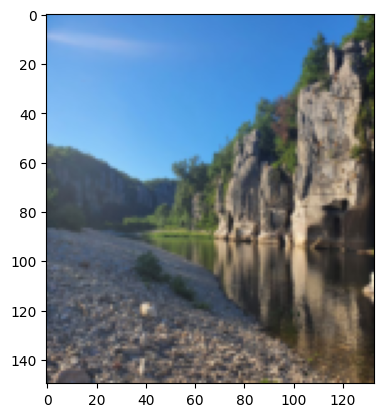

In [27]:
image_resized = resize(im_org, (im_org.shape[0] // 4,
                       im_org.shape[1] // 6),
                       anti_aliasing=True)

plt.imshow(image_resized)

**Exercise 19:** *Try to find a way to automatically scale your image so the resulting width (number of columns) is always equal to 400, no matter the size of the input image?*

In [28]:
def rescale_to_width(im: np.ndarray) -> np.ndarray: 
    H, W, C = im.shape 
    print(im.shape)
    factor_col = W/400
    
    image_resized = resize(im, (H/factor_col, W/factor_col), anti_aliasing=True)
    assert image_resized.shape[1]==400, "Failed unit-test"
    return image_resized

im_rsz = rescale_400_width(im_org)
plt.imshow(im_rsz)

im_subset = im_org[:199,:299,:]
plt.imshow(im_subset)
im_rsz = rescale_400_width(im_subset)
plt.figure()
plt.imshow(im_rsz)



NameError: name 'rescale_400_width' is not defined

To be able to work with the image, it can be transformed into a
gray-level image:

In [ ]:
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray) #for going back to uint8 

numpy.uint8

We are forcing the pixel type back into **unsigned bytes** using the `img_as_ubyte` function, since the `rgb2gray` functions returns the pixel values as floating point numbers.

**Exercise 19:** *Compute and show the histogram of you own image.*

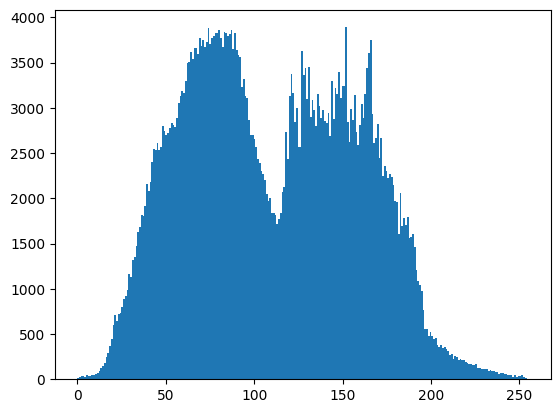

In [ ]:
h = plt.hist(im_byte.ravel(),bins=256)


road.png
**Exercise 20:** *Take an image that is very dark and another very light image. Compute and visualise the histograms for the two images. Explain the difference between the two.*

It is going to look very bimodal, maybe with some overlap for medium intensity regions. 

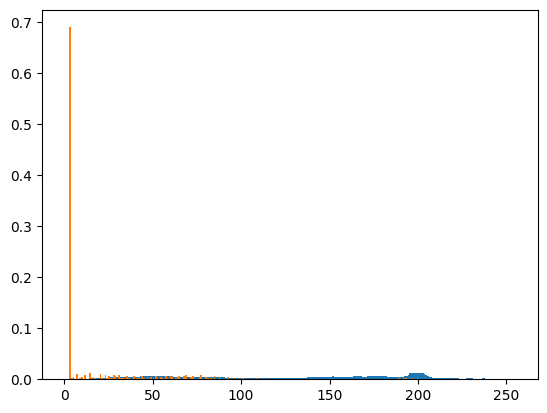

In [ ]:
im_bright = "DTUSign1.jpg"
im_dark = "dark_background.png"

im_bright = img_as_ubyte(color.rgb2gray(io.imread(in_dir+im_bright)))
im_dark = img_as_ubyte(color.rgb2gray(io.imread(in_dir+im_dark)))

plt.figure()
_ = plt.hist(im_bright.ravel(),bins=256, density=True) #we add density because they are very different in size. We could also omit it, but for this it is fine.  
_ = plt.hist(im_dark.ravel(),bins=256, density=True)


**Exercise 21:** *Take an image with a bright object on a dark background. Compute and visualise the histograms for the image. Can you recognise the object and the background in the histogram?*

Found max bin: 3 with intensity range [2.84765625;3.796875]


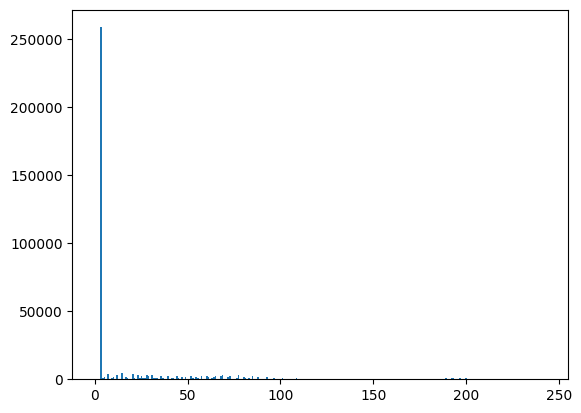

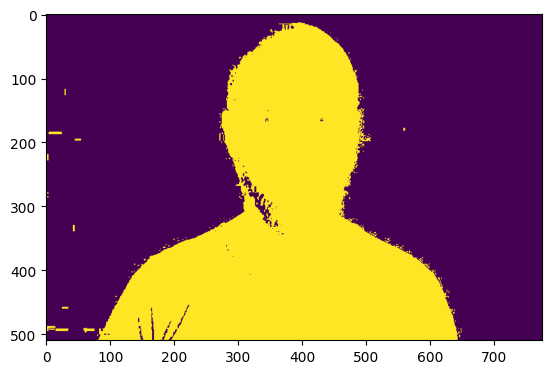

In [ ]:
#Probably just the part which is larger than the huge spike in intensity, lets try:
histogram_info = common_intensity_range(im_dark,n_bins=256)
max_intensity_in_range = histogram_info[1]

mask = im_dark > max_intensity_in_range
plt.figure()
plt.imshow(mask)



Yeah, we can somewhat

## Color channels

We are now going to look at the intensity values of the different channels of a color (RGB) image taken at DTU.

**Exercise 22:** *Start by reading and showing the **DTUSign1.jpg** image.*

You can visualise the red (R) component of the image using:

/tmp/ipykernel_39493/2851755595.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(r_comp)
/tmp/ipykernel_39493/2851755595.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


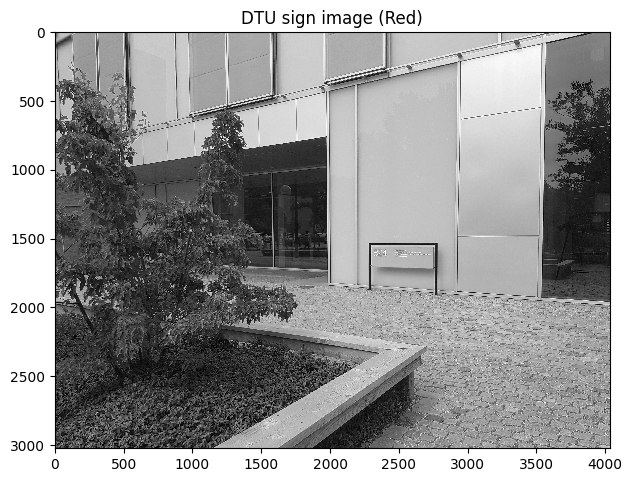

In [ ]:
im_org = io.imread(in_dir+"DTUSign1.jpg")
r_comp = im_org[:, :, 0]
plt.imshow(r_comp)
plt.title('DTU sign image (Red)')
plt.show()

**Exercise 23:** *Visualize the R, G, and B components individually. Why does the DTU Compute sign look bright on the R channel image and dark on the G and B channels?  Why do the walls of the building look bright in all channels?*

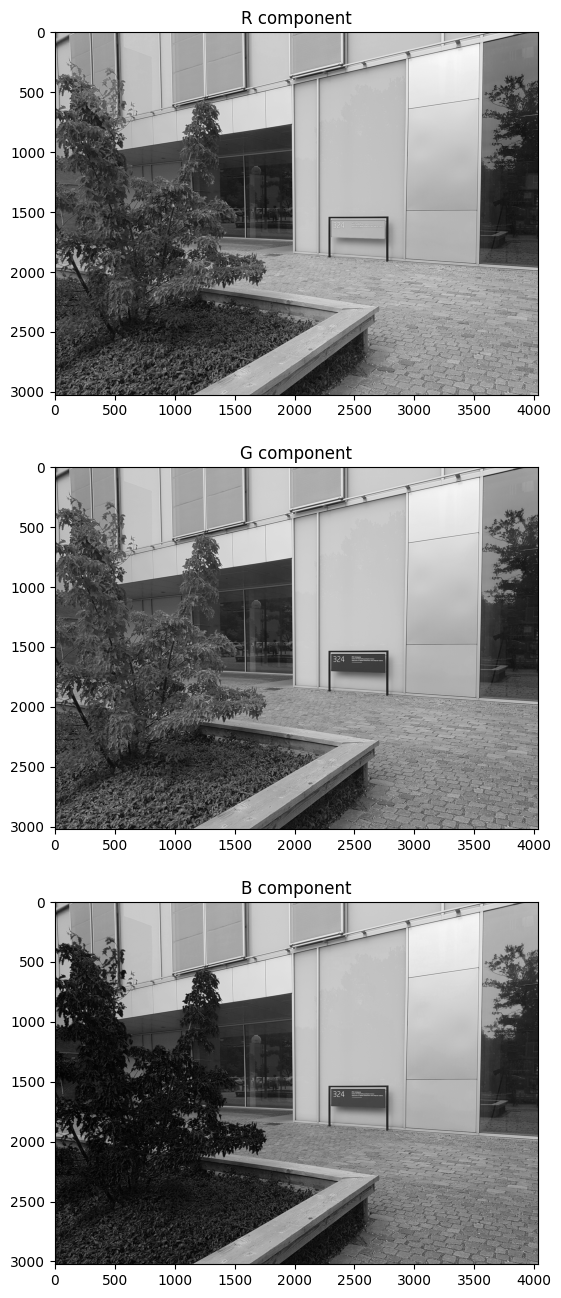

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(8,16))

channeldict = {"R":0, "G":1, "B": 2}

for channel_key in channeldict.keys():
    val = channeldict[channel_key] #can be omitted if loop over both keys/vals in one 
    ax[val].imshow(im_org[:,:,val],cmap="gray")
    ax[val].set_title(f"{channel_key} component")


#white is high in all channels because white means high intensity in all channels (in principle in all wavelengths in the visible spectrum)
#the sign is bright in red because the sign is red -> high intensity, and as red is a primary color, the other channels will not have a high intensity on a red sign

## Simple Image Manipulations

**Exercise 24:** *Start by reading and showing the **DTUSign1.jpg** image.* 

You can create a black rectangle in the image, by setting all RGB channels to zero in a given region. This is also an example of using NumPy slicing:

In [ ]:
im_org[500:1000, 800:1500, :] = 0

**Exercise 25:** *Show the image again and save it to disk as **DTUSign1-marked.jpg** using the `io.imsave` function. Try to save the image using different image formats like for example PNG.*

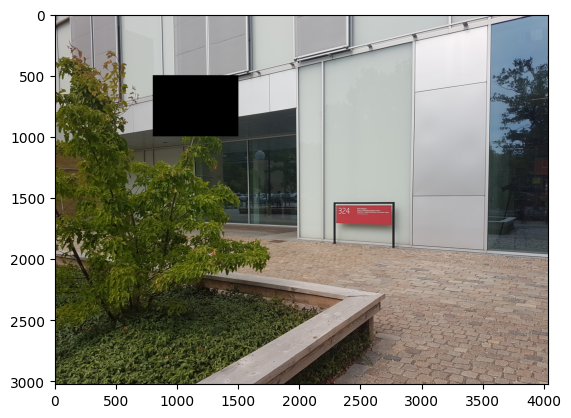

In [ ]:
plt.imshow(im_org)
io.imsave("dtu_sign_black_box.png",im_org)

**Exercise 26:** *Try to create a blue rectangle around the DTU Compute sign and save the resulting image.*


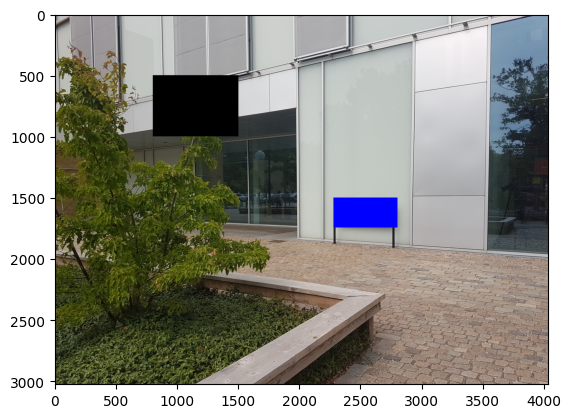

In [ ]:
im_org[1500:1745,2277:2801,-1] = 255
im_org[1500:1745,2277:2801,0:2] = 0
plt.imshow(im_org)
io.imsave("blue_dtu_sign.png",im_org)

**Exercise 27:** *Try to automatically create an image based on **metacarpals.png** where the bones are colored blue. You should use `color.gray2rgb` and pixel masks.*

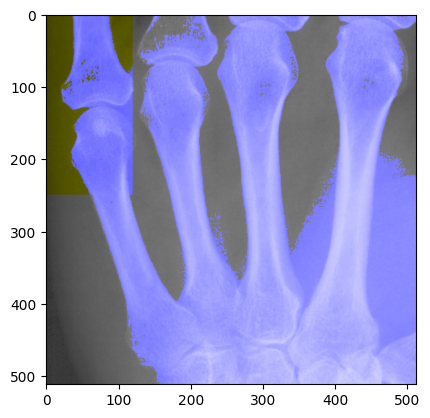

In [ ]:
im = io.imread(in_dir + "metacarpals.png")
#plt.hist(im.ravel(),bins=256)
#bone lies above ~106 intensity
mask = im >= 123
im_rgb = color.gray2rgb(im)
im_rgb[mask,-1] = 255
plt.figure()
plt.imshow(im_rgb)
#obviously we could continue refining the mask by partitioning image in different parts (e.g. 4 quadrants), and inspecting to check how the intensities behave in different parts of the image to actually make a perfect mask 

#as per example for upper left where we dont get all the bone, we make a small slice which only masks this area where intensities generally are a bit lower

mask = im>=101
im_rgb[:250,:120,-1] = mask[:250,:120]*255
plt.imshow(im_rgb)

#obviously this mask needs to be refined iteratively, because the connective tissue to the right has higher intensities generally than to the left, making the task a bit harder




## Advanced Image Visualisation

Before implementing a fancy image analysis algorithm, it is very important to get an intuitive understanding of how the image *looks as seen from the computer*. The next set of tools can help to gain a better understanding.

In this example, we will work with an x-ray image of the human hand. Bones are hollow and we want to understand how a hollow structure looks on an image. 

Start by reading the image **metarcarpals.png**. To investigate the properties of the hollow bone, a grey-level profile can be sampled across the bone. The tool `profile_line` can be used to sample a profile across the bone:

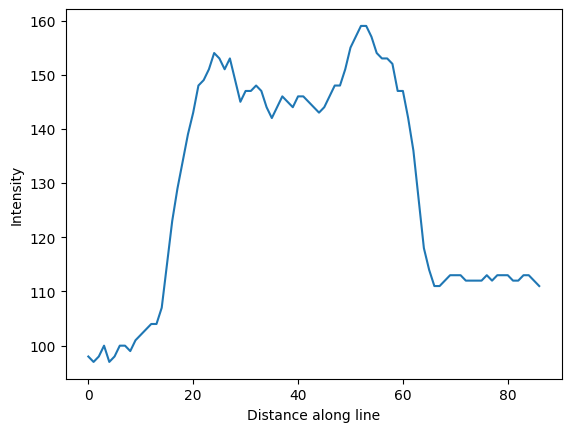

In [31]:
im_org = io.imread(in_dir+"metacarpals.png")
p = profile_line(im_org, (342, 77), (320, 160)) #src -> dst, output will be 
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

**Exercise 28:** *What do you see - can you recognise the inner and outer borders of the bone-shell in the profile?*

Yes, we notice the peak at around 15-20 which is the bone boundary, the inner is the hollow dip, and around 55 we notice the bone on the other side. 

An image can also be viewed as a landscape, where the height is equal to the grey level:

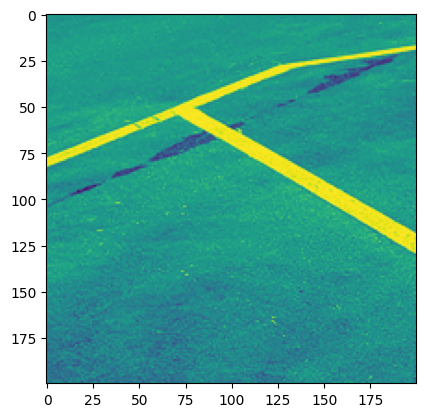

<Figure size 640x480 with 0 Axes>

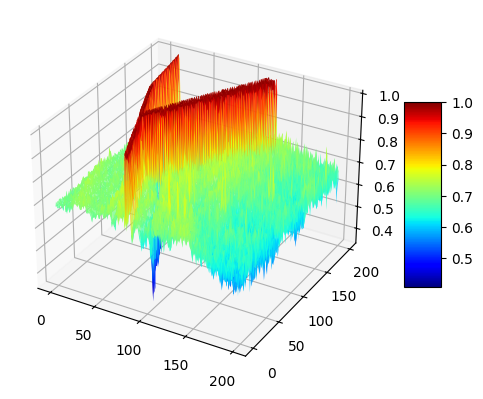

In [34]:
in_dir = "../data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
plt.figure()
plt.imshow(im_crop)

plt.figure()
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Use the mouse to rotate the view and find a good viewpoint. Notice how the white road markings are clearly visible on the 3D view.

## DICOM images

Typical images from the hospital are stored in the DICOM format. An example image from a computed tomography examination of abdominal area is used in the following.

Start by examining the header information using:

In [35]:
in_dir = "../data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 174
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008,0020) Study Date                          DA: '20140914'
(0008,0030) Study Time                          TM: ''
(0008,0050) Accession Number        

**Exercise 29:** *What is the size (number of rows and columns) of the DICOM slice?*
512 x 512 

This image has been **anonymized** so patient information has been removed. Else the patients name and diagnosis are sometimes also available. This makes medical images very complicated to share due to the need of protecting patient privacy.

We can get access to the pixel values of the DICOM slice by:

In [ ]:
im = ds.pixel_array

**Exercise 30:** *Try to find the shape of this image and the pixel type? Does the shape match the size of the image found by inspecting the image header information?*

In [38]:
print(im.shape)
print(type(im[0,0]))

(512, 512)
<class 'numpy.int16'>


We can visualize the slice using:

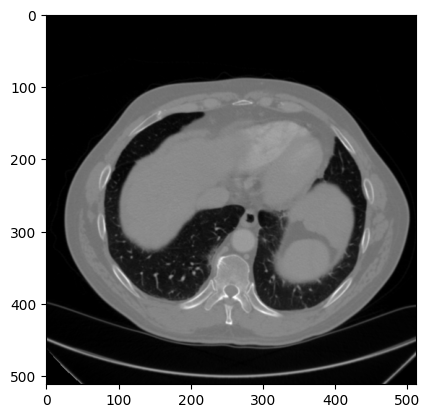

In [43]:
plt.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
plt.show()

As can be seen, the pixel values are stored as 16 bit integers and therefore it is necessary to specify which value range that should be mapped to the gray scale spectrum (using vmin and vmax). Try to experiment with the vmin and vmax values to get the best possible contrast in the image.



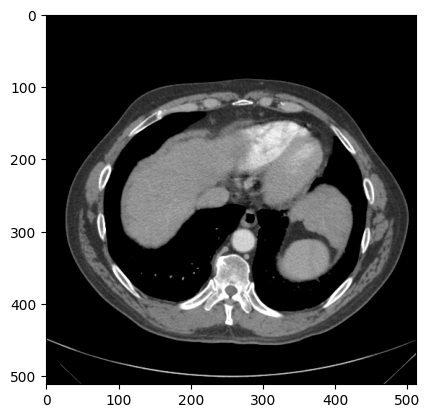

In [49]:
plt.imshow(im, vmin=-200, vmax=300, cmap='gray')
plt.show()